# The Sparks Foundation - GRIP June 2021

# Task 1 :- Prediction Using Supervised ML

# Aim :- To predict the percentage of a student based on the number of study hours.

# Author :- Abhishek R. Thakare


## Step 1 :- Importing the required libraries

In [3]:
# pandas is used to store the data in pandas dataframe
import pandas as pd 

# numphy helps with the calculations
import numpy as np 

# matplotlib is used to plot the graph
import matplotlib.pyplot as plt
%matplotlib inline

print("Libraries Imported Successfully")

Libraries Imported Successfully


##  Step 2 :- Importing and Reading Data

In [4]:
# Reading the Data
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)
print("Student Data Imported Successfully!!")
dataset.head(25)

Student Data Imported Successfully!!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3 :- Data Exploration

In [5]:
#checking the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#checking the datatypes of the dataset
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

In [7]:
shape=dataset.shape
print("The number of rows and columns ",shape)

The number of rows and columns  (25, 2)


In [8]:
#Checking if any missing value 
print("\nMissing Value : ",dataset.isnull().sum().values.sum())


Missing Value :  0


In [10]:
#Dataset description
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 4 :- Visualizing Dataset

<Figure size 720x360 with 0 Axes>

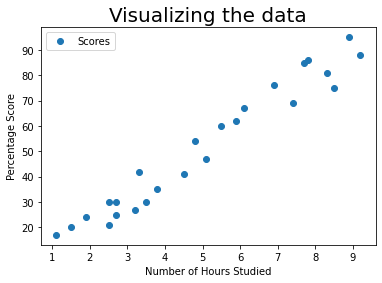

In [13]:
# Plotting the distribution of scores
plt.figure(figsize=(10,5))
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Visualizing the data',fontsize=20)  
plt.xlabel('Number of Hours Studied',fontsize=10)  
plt.ylabel('Percentage Score',fontsize=10)  
plt.show()

### The above graphs shows a positive linear relationship between the number of hours studied and the percentage score

## Step 5 :- Preparing Data

In [15]:
# Defining X and y from the Data
X = dataset.iloc[:, :-1].values  

y = dataset.iloc[:, 1].values

## Step 6 :- Splitting Data

In [16]:
# Importing train_test_split() method  from scikit package
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [18]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [20]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

## Step 7 :- Training the algorithm

In [22]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  

regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
#coefficient 
regressor.coef_

array([9.91065648])

In [25]:
#intercept
regressor.intercept_

2.0181600414346974

## Step 8 :- Regression Line

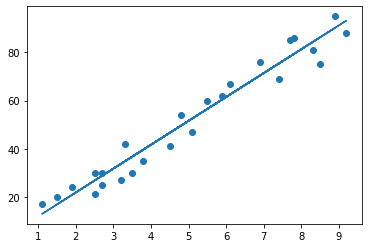

In [27]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Step 9 :- Making Predictions

In [28]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


## Step 10 :- Comparing Actual vs Predicted

In [29]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

In [31]:
print(data)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


## Step 11 :-  Visualizing the Training and Test set


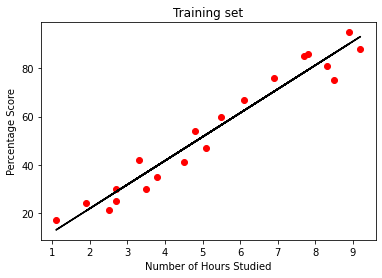

In [33]:
# Plotting the training set
plt.scatter(X_train,y_train, color= "Red")
plt.plot(X_train,regressor.predict(X_train), color = "black")
plt.title('Training set')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

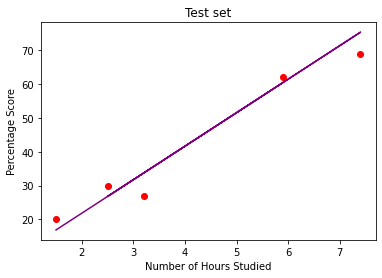

In [37]:
# Plotting the test set
plt.scatter(X_test,y_test, color= "Red")
plt.plot(X_test,regressor.predict(X_test), color = "Purple")
plt.title('Test set')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## To Find :- What will be predicted score if a student studies for 9.25 hrs/ day ?

In [41]:
hours = 9.25
pred = regressor.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737535


## According to the model, if a student studies for 9.25 hours he/she would obtain a score of 93.69173248737535

## Step 12 :- Evaluation Of The Model

In [44]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root mean squared Error: 4.647447612100367
